In [ ]:
#Libraries Import for Data Analysis, Visualization, and Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
#Libraries Import for Machine Learning Model Training and Classification

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
#Load and Preview Data

In [4]:
data = pd.read_csv("C:\\Users\\91814\\Downloads\\Instagram-Reach-Analysis-main\\Instagram-Reach-Analysis-main\\Instagram data.csv", encoding='latin1')
data.head(5)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [ ]:
#Check for Missing Values

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
#Remove Rows with Missing Values

In [6]:
data = data.dropna()

In [ ]:
#Get Dataset Summary

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [ ]:
#Plot Histogram of Impressions from Home

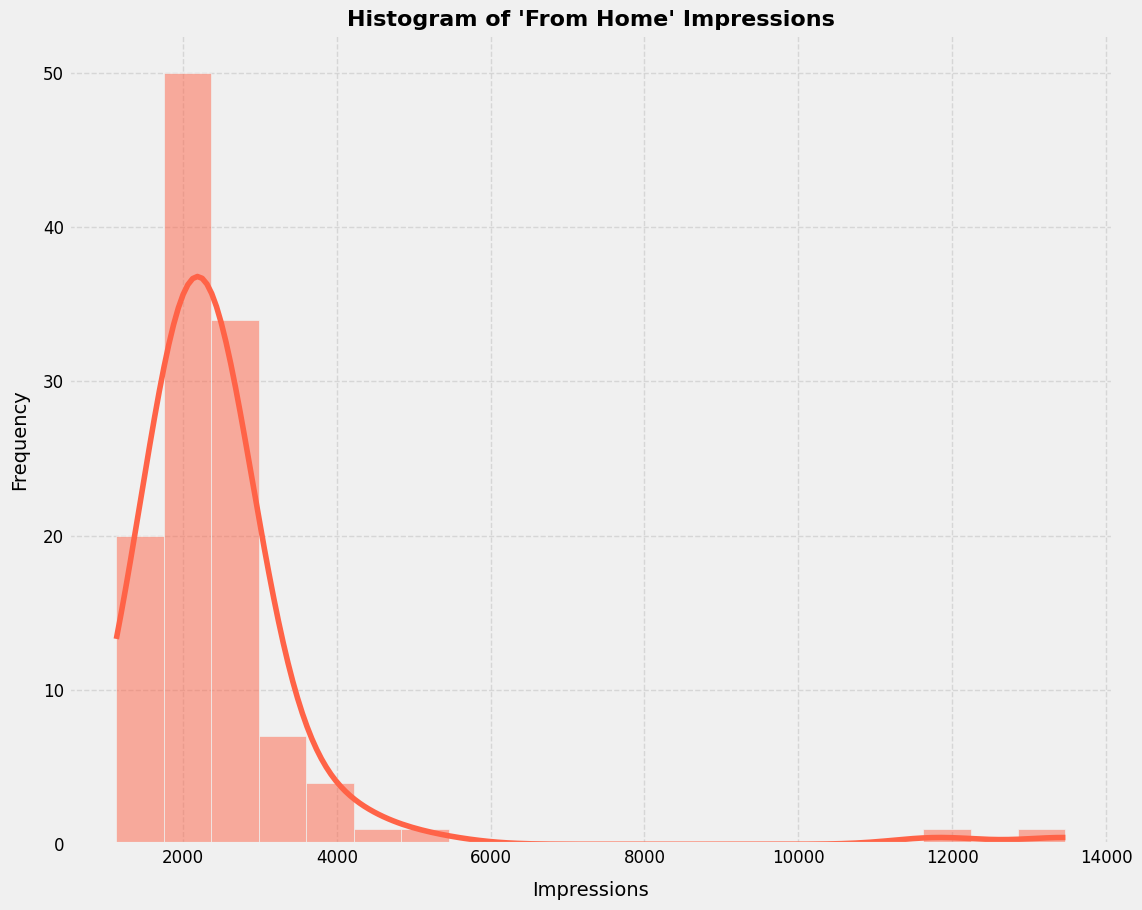

In [11]:
plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
sns.set_palette("coolwarm")
plt.title("Histogram of 'From Home' Impressions", fontsize=16, fontweight='bold')
sns.histplot(data['From Home'], kde=True, color='#FF6347', bins=20)
plt.xlabel("Impressions", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Plot Histogram of Impressions from Hashtags

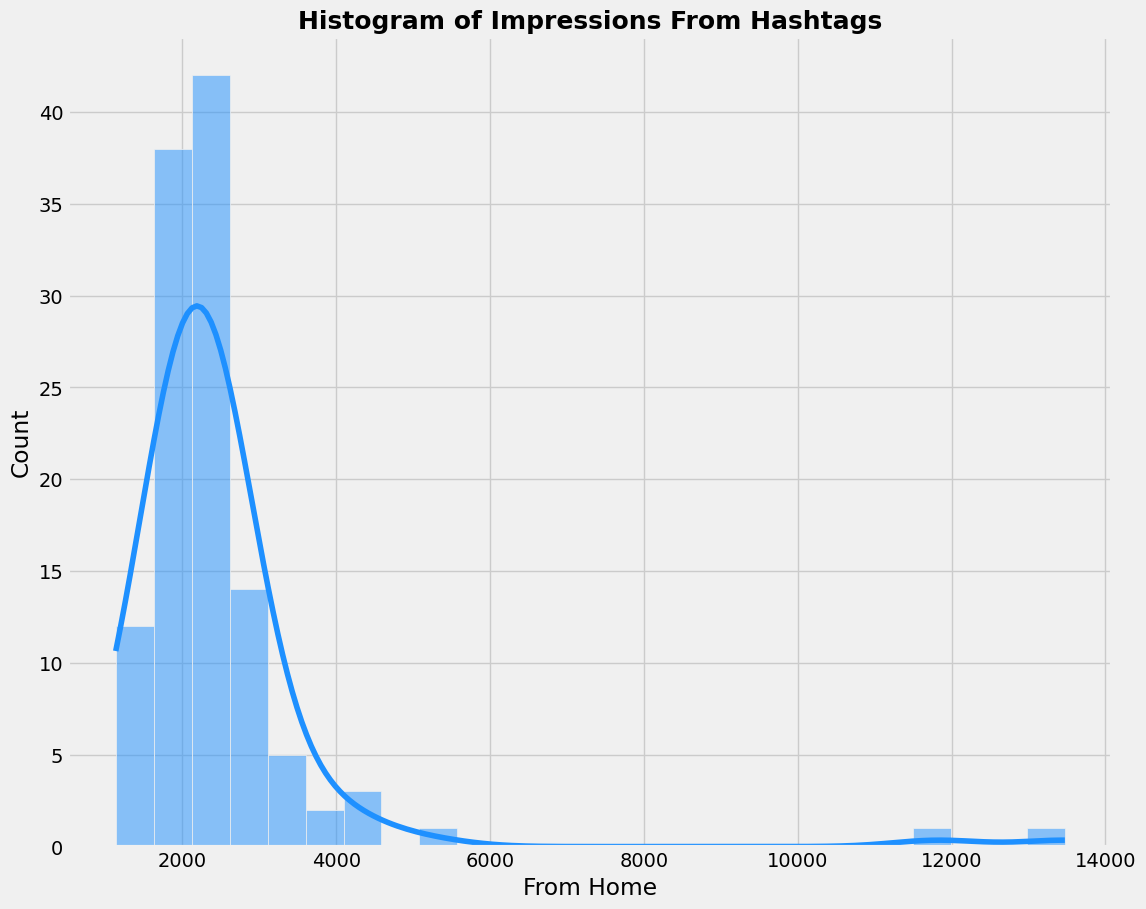

In [14]:
plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')
plt.title("Histogram of Impressions From Hashtags", fontsize=18, fontweight='bold')
sns.histplot(data['From Home'], kde=True, color='dodgerblue', bins=25)
plt.show()

In [ ]:
#visualizing the distribution of impressions from Explore with a customized histogram

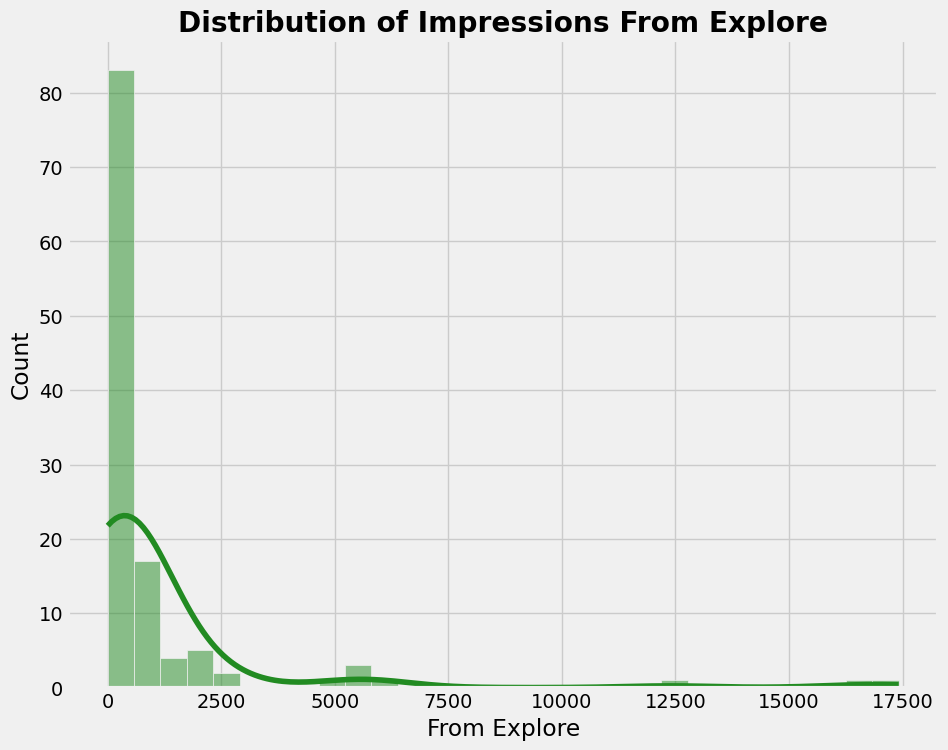

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore",fontweight='bold')
#sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'],kde=True, color='forestgreen', bins=30)
plt.show()

In [ ]:
#Interactive donut pie chart to visualize the distribution of Instagram impressions from various sources

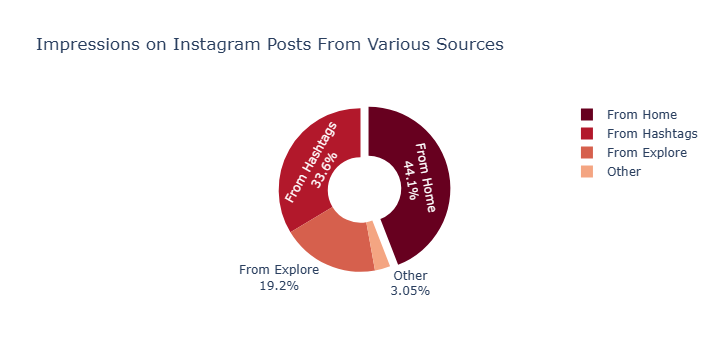

In [15]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
fig = px.pie(data_frame=data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources',hole=0.4,
             color_discrete_sequence=px.colors.sequential.RdBu) 
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0])
fig.show()

In [ ]:
#Generating a word cloud from Instagram captions

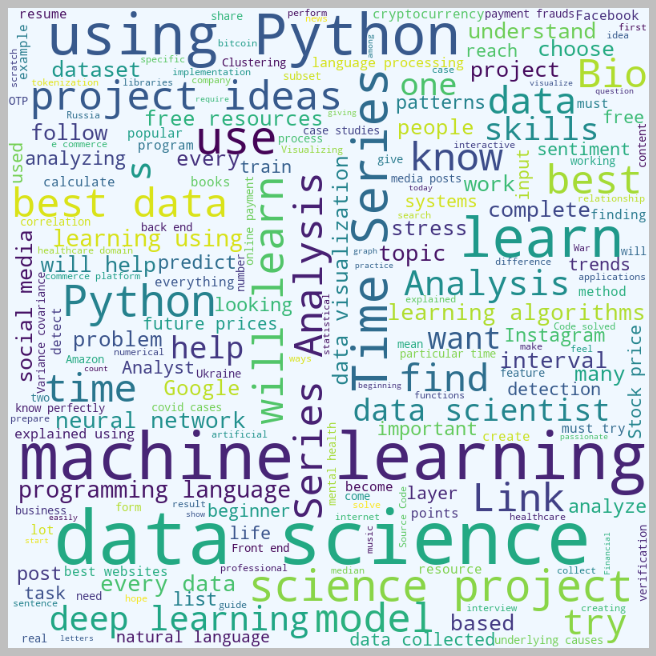

In [20]:
text = " ".join(data.Caption.dropna()).replace('\n', ' ').strip()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="aliceblue",width=800,height=800,
                      max_words=200,contour_color='black',contour_width=2).generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#This code generates a word cloud from the hashtags in the data and displays it, with stopwords excluded.

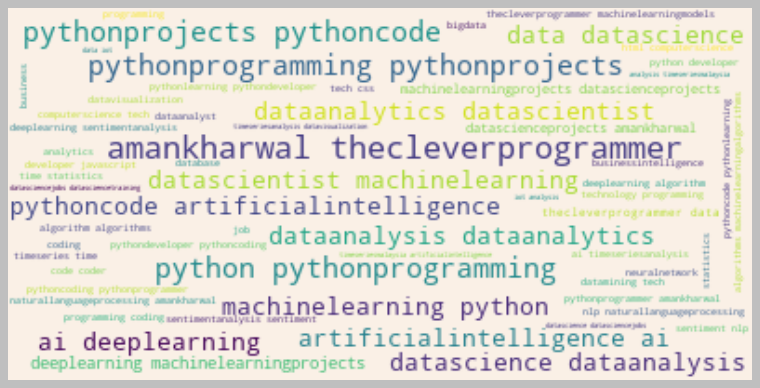

In [21]:
text = " ".join(data.Hashtags.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="linen").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Generates a scatter plot to visualize the relationship between Likes and Impressions with trendline.

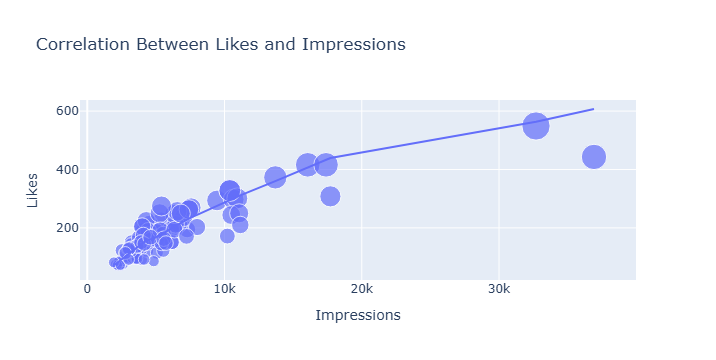

In [22]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="lowess", 
                    title = "Correlation Between Likes and Impressions")
figure.show()

In [ ]:
#enhanced scatter plot showing the relationship between Comments and Impressions with trendline

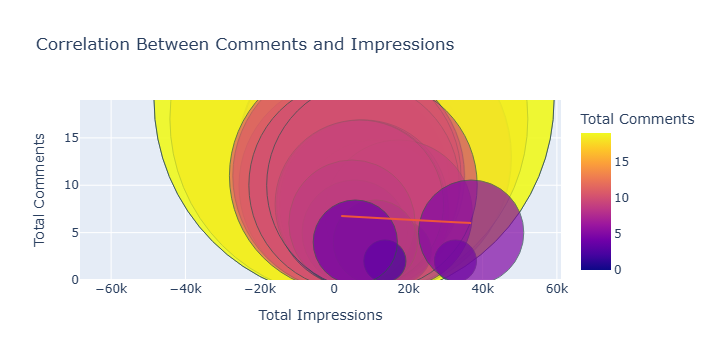

In [23]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Comments", size="Comments", color="Comments", trendline="ols", opacity=0.7, 
                    title="Correlation Between Comments and Impressions", 
                    labels={"Impressions": "Total Impressions", "Comments": "Total Comments"})  
figure.update_traces(marker=dict(sizemode='diameter', line=dict(width=1, color='DarkSlateGrey')))  
figure.show()

In [ ]:
#Scatter plot showing the relationship between Shares and Impressions.

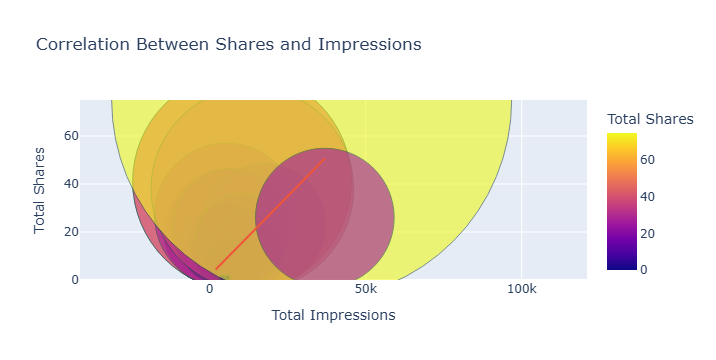

In [24]:
figure = px.scatter(data_frame=data, x="Impressions",y="Shares", size="Shares", color="Shares",
                    trendline="ols", opacity=0.6,title="Correlation Between Shares and Impressions",
                    labels={"Impressions": "Total Impressions", "Shares": "Total Shares"}) 
figure.update_traces(marker=dict(sizemode='diameter', line=dict(width=1, color='DarkSlateGrey')))  
figure.show()

In [ ]:
#Scatter plot showing the relationship between post Saves and Impressions.

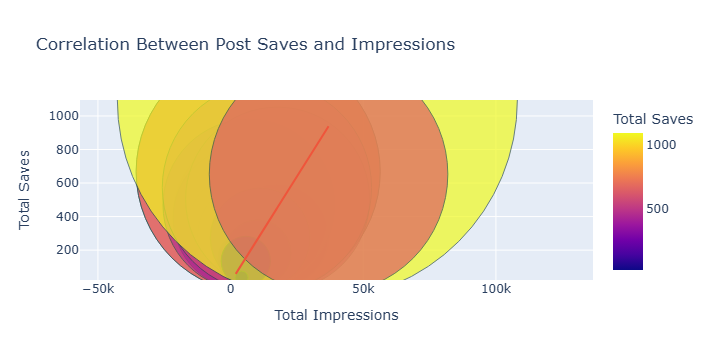

In [25]:
figure = px.scatter(data_frame=data, x="Impressions",y="Saves", size="Saves", color="Saves",
                    trendline="ols", opacity=0.7,title="Correlation Between Post Saves and Impressions",
                    labels={"Impressions": "Total Impressions", "Saves": "Total Saves"}) 
figure.update_traces(marker=dict(sizemode='diameter', line=dict(width=1, color='DarkSlateGrey'))) 
figure.show()

In [ ]:
#This code calculates and visualizes the correlation between numerical variables in the dataset, focusing on the relationship with "Impressions."

Impressions       1.00
From Explore      0.89
Follows           0.89
Likes             0.85
From Home         0.84
Saves             0.78
Profile Visits    0.76
Shares            0.63
From Other        0.59
From Hashtags     0.56
Comments         -0.03
Name: Impressions, dtype: float64


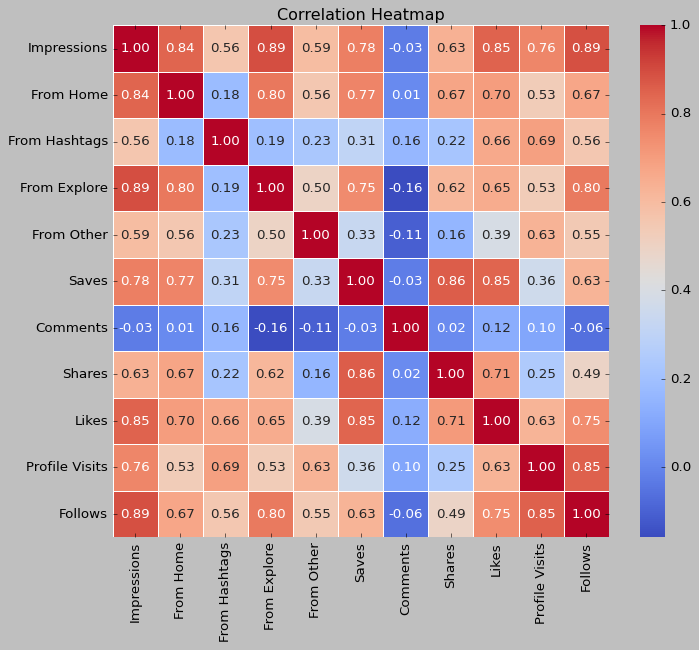

In [26]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
print(correlation["Impressions"].sort_values(ascending=False).round(2))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#This code calculates and displays the conversion rate between "Follows" and "Profile Visits," handling the case of zero profile visits.

In [27]:
follows_sum = data["Follows"].sum()
profile_visits_sum = data["Profile Visits"].sum()
if profile_visits_sum > 0:
    conversion_rate = (follows_sum / profile_visits_sum) * 100
else:
    conversion_rate = 0
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 41.00%


In [ ]:
#A scatter plot to visualize the relationship between "Profile Visits" and "Followers Gained," with a trendline and enhanced styling.

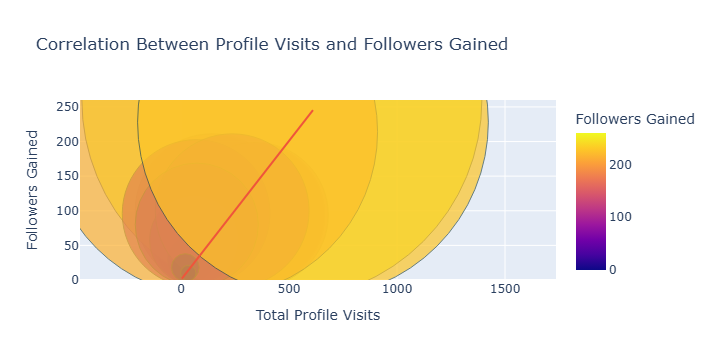

In [28]:
figure = px.scatter(data_frame=data, x="Profile Visits",y="Follows", size="Follows", color="Follows", 
                    trendline="ols", opacity=0.7,title="Correlation Between Profile Visits and Followers Gained", 
                    labels={"Profile Visits": "Total Profile Visits", "Follows": "Followers Gained"}) 
figure.update_traces(marker=dict(sizemode='diameter', line=dict(width=1, color='DarkSlateGrey'))) 
figure.show()

In [ ]:
#This code extracts features and target data, then splits them into training and testing sets for model preparation.

In [30]:
x = np.array(data[["Likes","Saves","Comments","Shares","Profile Visits", "Follows"]])
y = np.array(data["Impressions"])
xtrain, xtest , ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state= 42) 

In [ ]:
#This code trains a Passive-Aggressive Regressor model and evaluates its performance on the test set.

In [35]:
from sklearn.linear_model import PassiveAggressiveRegressor
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
score = model.score(xtest, ytest)
print("Model Score:", score)

Model Score: 0.8704979164108043


In [ ]:
#comment

In [37]:
sample_features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
predicted_impressions = model.predict(sample_features)  
print("Predicted Impressions:", predicted_impressions[0])

Predicted Impressions: 13363.107097016786
